**Created by Berkay Alan**

**Classification | XGBoost**

**17 January 2022**

**For more Tutorial:** https://github.com/berkayalan

## Resources

- **The Elements of  Statistical Learning** - Trevor Hastie,  Robert Tibshirani, Jerome Friedman -  Data Mining, Inference, and Prediction (Springer Series in Statistics) 

- [**What is a Confusion Matrix in Machine Learning?**](https://machinelearningmastery.com/confusion-matrix-machine-learning/)

- [**Classification: Precision and Recall**](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)

- [**Classification: ROC Curve and AUC**](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

- [**AUC-ROC Curve in Machine Learning Clearly Explained**](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/)

## Importing Libraries

In [104]:
from warnings import filterwarnings
filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,scale, RobustScaler
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score,roc_curve, classification_report,mean_squared_error,f1_score,recall_score,precision_score
import time
from xgboost import XGBClassifier
from skompiler import skompile

In order to see all rows and columns, we will increase max display numbers of dataframe.

In [106]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Classification and Evaluation Metrics

### Classification

Classification is the process of finding or discovering a model or function which helps in separating the data into multiple categorical classes i.e. discrete values. In classification, data is categorized under different labels according to some parameters given in input and then the labels are predicted for the data. 
The derived mapping function could be demonstrated in the form of “IF-THEN” rules. The classification process deal with the problems where the data can be divided into binary or multiple discrete labels. 

Some use-cases:

- Mail classification (spam or not)

- Diagnosis of the sicknesses

- Customer buying prediction (if customer will buy or not)

### Evaluation Metrics

#### Confusion Matrix

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate our model.  Confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

- **true positive**: These are cases in which we predicted positive, and they are actually positive.
- **false positive (Type 1 Error)**: We predicted postive, but they are actually negative. (Also known as a "Type 1 error.")
- **true negative**: We predicted negative, and they are actually negative.
- **false negative (Type 2 Error)**: We predicted negative, but they are actually postive. (Also known as a "Type 2 error.")

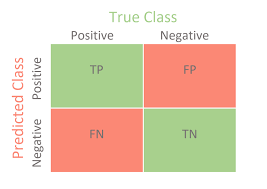

Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fconfusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826&psig=AOvVaw29atdmY9s4wmI-rc0qQZZb&ust=1628435461495000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCKj1g_2Yn_ICFQAAAAAdAAAAABAD).

**Notation**: TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

#### Accuracy

Accuracy is one metric for evaluating classification models. Informally, accuracy is **the fraction of predictions our model got right**.

Formally, accuracy has the following definition: All correct predictions / all predictions

For binary classification, accuracy can also be calculated in terms of positives and negatives as follow: (TP+TN) / (TP+FP+FN+TN)

#### Recall

Recall gives us the answer of this question :

**What proportion of actual positives was identified correctly?**

It is defined as follows: TP / (TP+FN)

#### Precision

Precision gives us the answer of this question : 

**What proportion of positive identifications was actually correct?**

It is defined as follows: TP / (TP+FP)

#### F1 - Score

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 

The formula for the F1 score is: 2 * (precision * recall) / (precision + recall)

#### ROC Curve (Receiver Operating Characteristic Curve)

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 

An ROC curve plots TP rates vs. FP rares at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

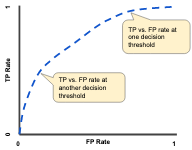

To compute the points in an ROC curve, we could evaluate a classification model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.

#### AUC (Area under Curve)

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

This is an example of AUC:

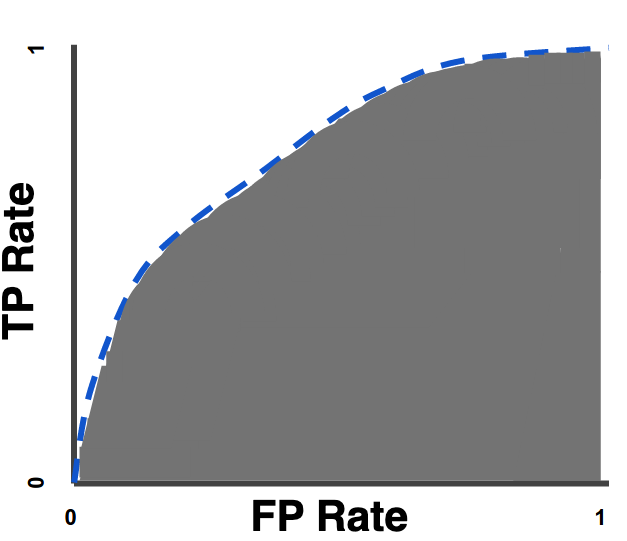

## XGBoost (Extreme Gradient Boosting) Classification

### Theory

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. 

**Advantages**

**Regularization**: XGBoost has an option to penalize complex models through both L1 and L2 regularization. Regularization helps in preventing overfitting

**Handling sparse data**: Missing values or data processing steps like one-hot encoding make data sparse. XGBoost incorporates a sparsity-aware split finding algorithm to handle different types of sparsity patterns in the data

**Weighted quantile sketch**: Most existing tree based algorithms can find the split points when the data points are of equal weights (using quantile sketch algorithm). However, they are not equipped to handle weighted data. XGBoost has a distributed weighted quantile sketch algorithm to effectively handle weighted data

**Block structure for parallel learning**: For faster computing, XGBoost can make use of multiple cores on the CPU. This is possible because of a block structure in its system design. Data is sorted and stored in in-memory units called blocks. Unlike other algorithms, this enables the data layout to be reused by subsequent iterations, instead of computing it again. This feature also serves useful for steps like split finding and column sub-sampling

**Cache awareness**: In XGBoost, non-continuous memory access is required to get the gradient statistics by row index. Hence, XGBoost has been designed to make optimal use of hardware. This is done by allocating internal buffers in each thread, where the gradient statistics can be stored

**Out-of-core computing**: This feature optimizes the available disk space and maximizes its usage when handling huge datasets that do not fit into memory

**Parallelization**: XGBoost approaches the process of sequential tree building using parallelized implementation. This is possible due to the interchangeable nature of loops used for building base learners; the outer loop that enumerates the leaf nodes of a tree, and the second inner loop that calculates the features. This nesting of loops limits parallelization because without completing the inner loop (more computationally demanding of the two), the outer loop cannot be started. Therefore, to improve run time, the order of loops is interchanged using initialization through a global scan of all instances and sorting using parallel threads.

The most commonly configured hyperparameters are the following:

- **n_estimators**: The number of trees in the ensemble, often increased until no further improvements are seen.

- **max_depth**: The maximum depth of each tree, often values are between 1 and 10.

- **eta**: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.

- **subsample**: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.

- **colsample_bytree**: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.

### Model

For a real world example, we will work with **Pima Indians Diabetes** dataset by UCI Machine Learning as before.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

We will try to predict whether the patient has diabetes or not.

In [535]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [536]:
df.shape

(768, 9)

In [537]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [538]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [539]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [541]:
xgb_classifier = XGBClassifier().fit(X_train,y_train)

[23:11:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [542]:
xgb_classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

In [543]:
xgb_classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [544]:
xgb_classifier.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate out model.

In [545]:
y_pred = xgb_classifier.predict(X_test)

In [546]:
cm = confusion_matrix(y_test,y_pred)

In [547]:
cm

array([[88, 20],
       [24, 36]])

In [548]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7380952380952381


In [549]:
accuracy_score(y_test,y_pred)

0.7380952380952381

In [550]:
recall_score(y_test,y_pred)

0.6

In [551]:
precision_score(y_test,y_pred)

0.6428571428571429

In [552]:
f1_score(y_test,y_pred)

0.6206896551724138

In [553]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       108
           1       0.64      0.60      0.62        60

    accuracy                           0.74       168
   macro avg       0.71      0.71      0.71       168
weighted avg       0.73      0.74      0.74       168



### Model Tuning

In [556]:
xgb_classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Now we will try to tune our model by using **K-Fold Cross Validation**.

In [557]:
accuracies= cross_val_score(estimator=xgb_classifier,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

[23:14:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [558]:
xgb_classifier.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

Now we will tune our model with GridSearch. We will tune *learning_rate*, *max_depth*, *n_estimators* and *subsample* parameters.

In [560]:
xgboost_params ={"learning_rate":[0.1,0.01,0.02,0.05],
                 "subsample":[0.6,0.8,1.0],
                 "max_depth":[1,2,3,4,5,6],
                 "n_estimators":[100,500,1000,2000]}

All hyperparameters can be found [here](https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning).

In [561]:
xgboost_classifier = XGBClassifier()
xgboost_cv = GridSearchCV(xgboost_classifier,xgboost_params,cv=9,n_jobs=-1,verbose=2)

In [562]:
start_time = time.time()

xgboost_cv.fit(X_train,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for XGBoost Classifier cross validation: "
      f"{elapsed_time:.3f} seconds")

Fitting 9 folds for each of 288 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 41.8min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 55.9min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed: 57.2min finished


[00:21:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Elapsed time for Decision Tree Classifier cross validation: 3430.689 seconds


In [563]:
#best score
xgboost_cv.best_score_

0.7634303231318157

In [564]:
#best parameters
xgboost_cv.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.8}

In [566]:
xgboost_tuned = XGBClassifier(learning_rate=0.05,max_depth=2,
                              subsample=0.8,n_estimators=100).fit(X_train,y_train)

[00:22:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [567]:
xgboost_tuned

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [568]:
y_pred = xgboost_tuned.predict(X_test)

In [569]:
cm = confusion_matrix(y_test,y_pred)

In [570]:
cm

array([[94, 14],
       [24, 36]])

In [571]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7738095238095238


In [572]:
accuracy_score(y_test,y_pred)

0.7738095238095238

In [573]:
recall_score(y_test,y_pred)

0.6

In [574]:
precision_score(y_test,y_pred)

0.72

In [575]:
f1_score(y_test,y_pred)

0.6545454545454547

In [576]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       108
           1       0.72      0.60      0.65        60

    accuracy                           0.77       168
   macro avg       0.76      0.74      0.74       168
weighted avg       0.77      0.77      0.77       168



If you want to see other algorithms such as:

- Logistic Regression (Theory - Model- Tuning)

- Decision Tree Classification (Theory - Model- Tuning)

- Support Vector Machines(SVC) - Linear Kernel (Theory - Model- Tuning)

- Support Vector Machines(SVC) - Radial Basis Kernel (Theory - Model- Tuning)

- Naive Bayes Classification (Theory - Model)

- K - Nearest Neighbors(KNN) (Theory - Model- Tuning)

- Ensemble Learning - Random Forests Classification (Theory - Model- Tuning)

Please visit my [Classification tutorial](https://github.com/berkayalan/Data-Science-Tutorials/blob/master/Classification/Classification.ipynb)